## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
# loading data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
print(f'Dataset contains, rows: {df.shape[0]} and cols: {df.shape[1]}')

Dataset contains, rows: 294478 and cols: 5


c. The number of unique users in the dataset.

In [6]:
user_count = df['user_id'].nunique()
print(f'The number of unique users in the dataset: {user_count}')

The number of unique users in the dataset: 290584


d. The proportion of users converted.

In [7]:
converted_user_count = df.query('converted == 1')['user_id'].nunique()
print(f'The number of converted users are {converted_user_count}')
converted_user_prop = converted_user_count / user_count
print(f'The praportion of converted users are {converted_user_prop:.3f}')

The number of converted users are 35173
The praportion of converted users are 0.121


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# Control group is identical to all other items or subjects that you are examining with the exception that it does not receive the treatment or the experimental manipulation that the treatment group receives
treatment_old_page_count = df.query('group == "treatment" & landing_page != "new_page"')['user_id'].count()
control_new_page_count = df.query('group == "control" & landing_page != "old_page"')['user_id'].count()
total_missmatch = treatment_old_page_count + control_new_page_count
print(f'The number of times the new_page and treatment dont line up is {total_missmatch}')

The number of times the new_page and treatment dont line up is 3893


f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Based on the above information regarding the dataframe, there seems to be no missing data in any column as all of them have 294478 non-null values which equals the number of rows in the dataframe.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [0]:
# it is best to remove these rows as we should only use the rows that we can feel confident in the accuracy of the data.
index_to_drop = df.query('(group == "treatment" & landing_page != "new_page") | (group == "control" & landing_page != "old_page")').index
df2 = df.drop(index_to_drop)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2_unique_userid_count = df2['user_id'].nunique()
print(f'Number of unique users in df2 are {df2_unique_userid_count} but there are {df2.shape[0]} rows in dataset')

Number of unique users in df2 are 290584 but there are 290585 rows in dataset


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# The resulting object will be in descending order so that the first element is the most frequently-occurring element
repeated_userid = df2['user_id'].value_counts().index.tolist()[0]
print(f'The userid which repeats is {repeated_userid}')

The userid which repeats is 773192


c. What is the row information for the repeat **user_id**? 

In [14]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [0]:
df2.drop(df2.query('timestamp == "2017-01-14 02:55:59.590927"').index, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2_converted_prob = df['converted'].mean()
print(f'Probability of an individual converting regardless of the page they receive: {df2_converted_prob:.4f}')

Probability of an individual converting regardless of the page they receive: 0.1197


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2_control_converted_prob = df2.query('group == "control" & converted == 1')['user_id'].count() /  df2.query('group == "control"')['user_id'].count()
print(f'Probability they converted being in the control group is {df2_control_converted_prob:.4f}')

Probability they converted being in the control group is 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2_treatment_converted_prob = df2.query('group == "treatment" & converted == 1')['user_id'].count() / df2.query('group == "treatment"')['user_id'].count()
print(f'Probability they converted being in the treatment group is {df2_treatment_converted_prob:.4f}')

Probability they converted being in the treatment group is 0.1188


d. What is the probability that an individual received the new page?

In [19]:
df2_new_page_prob = df2.query('landing_page == "new_page"')['user_id'].count() / df2.shape[0]
print(f'Probability that an individual received the new page is {df2_new_page_prob:.3f}')

Probability that an individual received the new page is 0.500


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> First, we can see that 50% of the individuals received the new page hence the results cant be biased due to imbalance of data. Next, even though the control group had a higher conversion rate it was by a very small margin of 0.2% which is not statistically significant.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> **Null**: The old page is eqully good or better
>
> $H_{0}$: $p_{old}$ >= $p_{new}$
>
> **Alternate**: The new page is better 
>
> $H_{1}$: $p_{new}$ > $p_{old}$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
print(f'convert rate for  p_new  under the null is {p_new:.4f}')

convert rate for  p_new  under the null is 0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2['converted'].mean()
print(f'convert rate for  pold  under the null is {p_old:.4f}')

convert rate for  pold  under the null is 0.1196


c. What is $n_{new}$?

In [22]:
n_new = df2.query('group == "treatment"').shape[0]
print(f'n_new = {n_new}')

n_new = 145310


d. What is $n_{old}$?

In [23]:
n_old = df2.query('group == "control"').shape[0]
print(f'n_old = {n_old}')

n_old = 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [0]:
new_page_converted = np.random.binomial(n_new, p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [0]:
old_page_converted = np.random.binomial(n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_new_temp = new_page_converted / n_new
p_old_temp = old_page_converted / n_old
p_diff = p_new_temp - p_old_temp
print(f'p_new - p_old = {p_diff}')

p_new - p_old = 0.0006036279435710223


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [0]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_new_temp = new_page_converted / n_new
    p_old_temp = old_page_converted / n_old
    p_diff = p_new_temp - p_old_temp
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

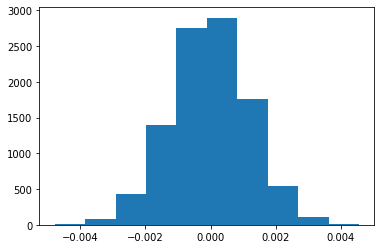

In [28]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
act_diff =  df2_treatment_converted_prob - df2_control_converted_prob
print(f'the actual difference observed was {act_diff}')

the actual difference observed was -0.0015782389853555567


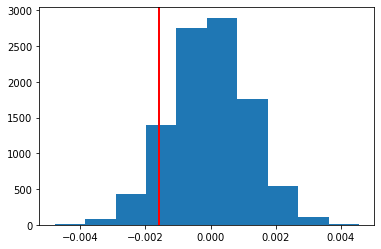

In [30]:
plt.hist(p_diffs);
plt.axvline(x=act_diff, color='r', linewidth=2)

In [31]:
p_diffs = np.array(p_diffs)
# probability of a statistic higher than observed
p_value = (act_diff < p_diffs).mean()
print(f'p_value = {p_value}')

p_value = 0.9035


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> In part j. we computed the P-value which is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
>
> Here we observe a P-value of 0.9, remember that large p-value suggests that we shouldn't move away from the null hypothesis 
>
> Which in this case would mean we fail to reject the hull hypothesis in favor of an alternative, which means the old landing page has a conversion rate better or equal to new landing page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

print(f'There were {n_old} individuals in control group')
print(f'There were {n_new} individuals in treatment group')
print(f'The old page converted {convert_old} individuals')
print(f'The new page converted {convert_new} individuals')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


There were 145274 individuals in control group
There were 145310 individuals in treatment group
The old page converted 17489 individuals
The new page converted 17264 individuals


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(f'z_score: {z_score:.4f}')
print(f'p_value: {p_value:.4f}')

z_score: 1.3109
p_value: 0.9051


In [34]:
# check significance of our z-score using norm function
from scipy.stats import norm
# Cumulative distribution function
cdf = norm.cdf(z_score)

# assuming a 95% confidence level
# Percent point function (inverse of cdf — percentiles)
ppf = norm.ppf(1-(0.05))

print(f'cdf: {cdf:.4f}')
print(f'ppf: {ppf:.4f}')

cdf: 0.9051
ppf: 1.6449


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> Here we find that the z_score of 1.31 is less than critical value of 95% confidence resulting in 1.64. Hence we fail to reject null hypothesis. This is the same conclusion as part j where we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
# since there are only two choices, we will use logistic regression
import statsmodels.api as sm

logit = sm.Logit( df2['converted'], df2[['intercept' ,'treatment']] )
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        12:17:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> The p-value associated with ab_page is 0.9 and this is a single sided test 
> hence the hypotheses associated with the regression model is:
>
> $H_{1}$: $p_{old}$ != $p_{new}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Other factors can certainly be added which may indicate weather or not an individual might convert. Some of these factors can be age, gender and location. Each of these provide insights that may help improve the accuracy. At the same time we need to keep in mind that some of these factors may have unexpected consequences and affect the trends that are detected from the data. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [39]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
### Create the necessary dummy variables
df_new['intercept'] = 1
df_new[['CA', 'UK', 'US', ]] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
### Fit Your Linear Model And Obtain the Results
model = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])

results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 06 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        12:17:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

The above findings conclude that there is not enough evidence to show interaction between the two country variables and page coversion rate since they both have a low p value. Hence once again we fail to reject the null hypothesis.

Through the various analysis we have performed so far, there isnt sufficient evidence to suggest the the new webpage has a higher conversion rate.  